# **Симуляция (2 балла)**


Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).
Симуляция заключается в следующем:
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.

In [134]:
import random
from typing import List

def simulate(n: int, k: int) -> List[int]:
    sequence = [i + 1 for i in range(n)]
    for _ in range(k):
        a, b = sorted(random.sample(range(n), 2))
        sequence[a:b+1] = [-x for x in reversed(sequence[a:b+1])]
    return sequence


# **Жадный алгоритм сортировки поворотами (2 балла)**
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [123]:
def greedy_sort(seq: List[int]) -> int:
    n, res = len(seq), 0
    for i in range(n):
        if seq[i] == i + 1: continue
        m = next(j for j in range(i, n) if abs(seq[j]) == i + 1)
        seq[i:m+1] = [-x for x in reversed(seq[i:m+1])]
        res += 1 + (seq[i] == -(i + 1))
        seq[i] = -seq[i] if seq[i] < 0 else seq[i]
    return res

In [ ]:
seq = simulate(100)
greedy_sort(seq)

# **Анализ расстояния (4 балла)**
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния. Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симмуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).
Постарайтесь объяснить, что происходит.

In [146]:
k_test = []
perfect = []
greedy = []
for k in range(1, 2000, 30):
    distances = []
    for _ in range(10):
        distances.append(greedy_sort(simulate(1000, int(k))))
    k_test.append(k)
    perfect.append(k)
    greedy.append(sum(distances) / len(distances))

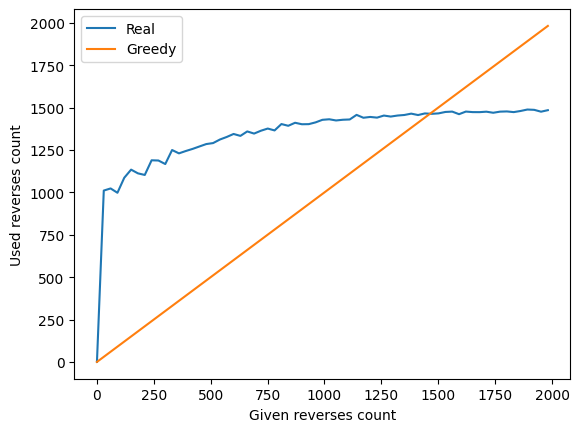

In [147]:
import matplotlib.pyplot as plt


plt.plot(k_test, greedy)
plt.plot(k_test, perfect)
plt.ylabel("Used reverses count")
plt.xlabel("Given reverses count")
plt.legend(["Real", "Greedy"])
plt.show()

Как видно из результатов в какой-то момент количество операций жадного алгоритма выходит на плато. Наша симуляция детектировала точку поломки на уровне $1.4n$.

Попробуем это объяснить. Число операций жадного алгоритма зависит от двух типов перестановок:


1.   От перестановки чисел, вне зависимости от знака.
2.   От смены знака.

В первом случае, вероятность, что на $k$ позиции элемент уже стоит на своем месте равна отношению единицы (так как позиция $k$ всего одна в последовательности) к количеству оставшихся неотсортированных позиций в последовательности, т. е. $n - k + 1$. В таком случае, матожидание количества таких перестановок примерно равно $n$.

Во втором случае, мы с вероятностью $\frac{1}{2}$ поменяем знак с $+$ на $-$ или наоборот. То есть матожидание равно $\frac{1}{2}n$

Итого получаем оценку для числа операций жадного алгоритма в $1.5 n$. Из результатов видно, что при $k > 1.4n$ делает меньше операций, чем мы сделали в симуляции. 


---


Таким образом, точка поломки на уровне  
$k \approx 1.4n$.